In [173]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [174]:
df = pd.read_csv('dataset3_l4.csv')
df.columns = df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [175]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder()

for col in categorical_columns[:-1]:
    unique_count = df[col].nunique()
    if unique_count == 2:
        df[col] = label_encoder.fit_transform(df[col])
    else:
        encoded_df = pd.DataFrame(onehot_encoder.fit_transform(df[[col]]).toarray(), columns=onehot_encoder.get_feature_names_out([col]))
        df = pd.concat([df, encoded_df], axis=1)
        df.drop(columns=[col], inplace=True)

In [176]:
ss = ShuffleSplit(n_splits=3, test_size=0.33, random_state=42)

for i, (train_indices, test_indices) in enumerate(ss.split(df)):
    if i == 1:
        train_set = df.iloc[train_indices]
        test_set = df.iloc[test_indices]
        break

In [177]:
X_train, X_test = train_set.drop("NObeyesdad", axis=1), test_set.drop("NObeyesdad", axis=1)
y_train, y_test = train_set["NObeyesdad"], test_set["NObeyesdad"]

model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

Класифікаційні метрики для тренувальної вибірки:
                     precision    recall  f1-score   support

Insufficient_Weight       0.87      1.00      0.93       180
      Normal_Weight       0.95      0.66      0.78       187
     Obesity_Type_I       0.91      0.94      0.93       227
    Obesity_Type_II       0.96      0.99      0.97       203
   Obesity_Type_III       0.98      1.00      0.99       228
 Overweight_Level_I       0.85      0.91      0.88       191
Overweight_Level_II       0.90      0.90      0.90       198

           accuracy                           0.92      1414
          macro avg       0.92      0.91      0.91      1414
       weighted avg       0.92      0.92      0.91      1414

Класифікаційні метрики для тестової вибірки:
                     precision    recall  f1-score   support

Insufficient_Weight       0.82      1.00      0.90        92
      Normal_Weight       0.87      0.53      0.66       100
     Obesity_Type_I       0.85      0.94      0.

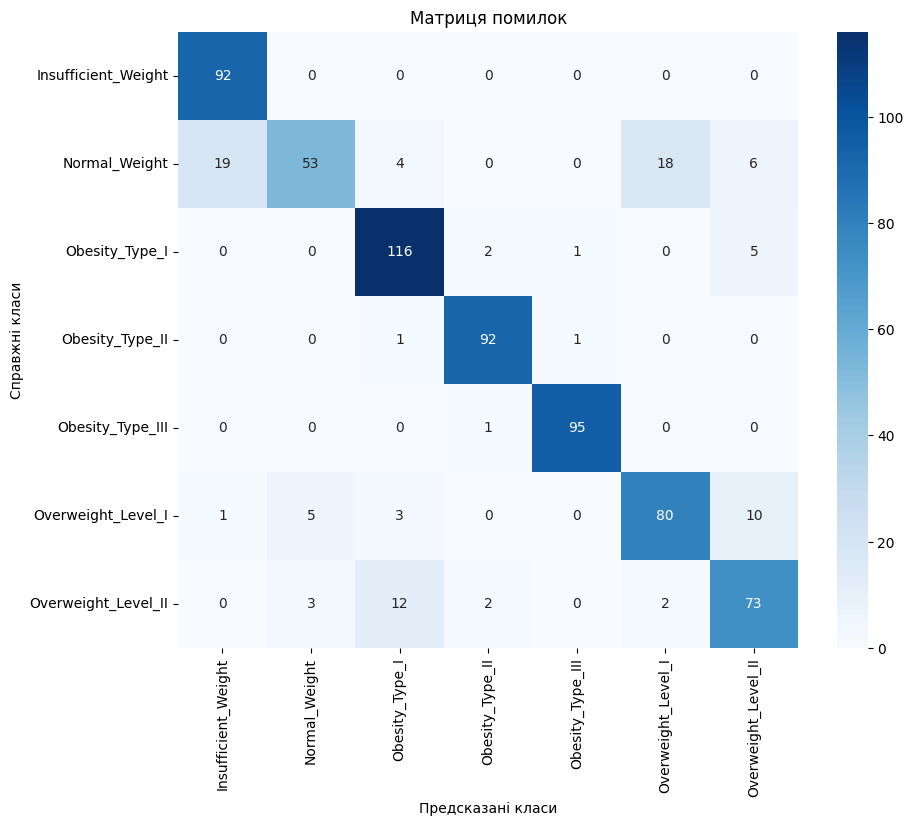

In [178]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f"Класифікаційні метрики для тренувальної вибірки:\n{classification_report(y_train, y_train_pred)}")
print(f"Класифікаційні метрики для тестової вибірки:\n{classification_report(y_test, y_test_pred)}")


cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Предсказані класи')
plt.ylabel('Справжні класи')
plt.title('Матриця помилок')
plt.show()

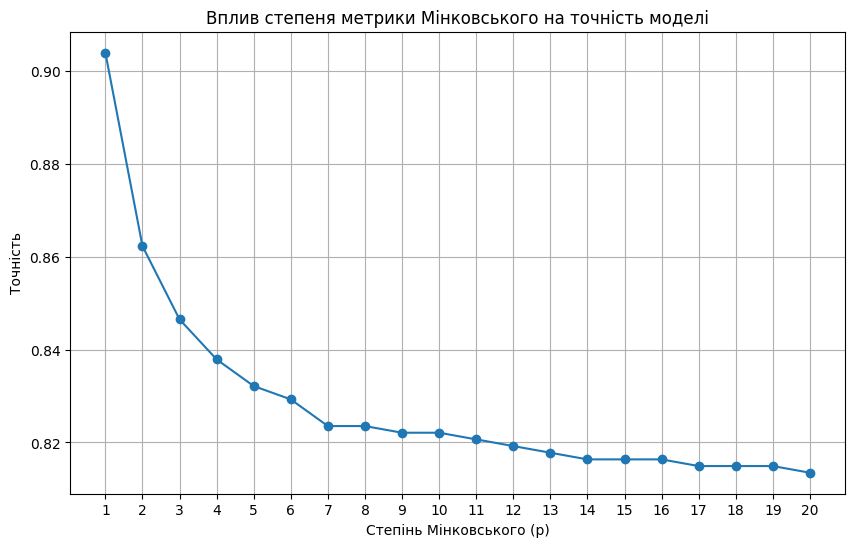

In [180]:
p_values = range(1, 21)
accuracies = []

for p in p_values:
    model = KNeighborsClassifier(p=p)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(p_values, accuracies, marker='o')
plt.title('Вплив степеня метрики Мінковського на точність моделі')
plt.xlabel('Степінь Мінковського (p)')
plt.ylabel('Точність')
plt.xticks(np.arange(1, 21, step=1))
plt.grid(True)
plt.show()